<a href="https://colab.research.google.com/github/orannahum/8-PSK_GMM_clustering/blob/main/8_PSK_clustering_tirh_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
!pip install bayespy


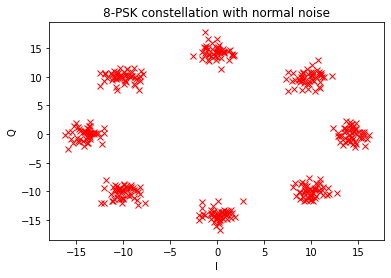

In [252]:
>>> import numpy as np
>>> import bayespy.plot as bpplt
import math

>>> y0 = np.random.multivariate_normal([-10, 10], [[1, 0], [0, 1]], size=50)
>>> y1 = np.random.multivariate_normal([10, 10], [[1, 0], [0, 1]], size=50)
>>> y2 = np.random.multivariate_normal([-10, -10], [[1, 0], [0, 1]], size=50)
>>> y3 = np.random.multivariate_normal([10, -10], [[1, 0], [0, 1]], size=50)
>>> y4 = np.random.multivariate_normal([math.sqrt(2)*10, 0], [[1, 0], [0, 1]], size=50)
>>> y5 = np.random.multivariate_normal([-math.sqrt(2)*10, 0], [[1, 0], [0, 1]], size=50)
>>> y6 = np.random.multivariate_normal([0, 10*math.sqrt(2)], [[1, 0], [0, 1]], size=50)
>>> y7 = np.random.multivariate_normal([0, -10*math.sqrt(2)], [[1, 0], [0, 1]], size=50)

>>> y = np.vstack([y0, y1, y2, y3,y4,y5,y6,y7])
>>> bpplt.pyplot.plot(y[:,0], y[:,1], 'rx')
plt.title("8-PSK constellation with normal noise")
plt.xlabel("I")
plt.ylabel("Q")
plt.show()

In [253]:
N = 400
D = 2
K = 40


In [254]:
1e-4

0.0001

Iteration 1: loglike=-5.340939e+03 (0.017 seconds)
Iteration 2: loglike=-4.767860e+03 (0.016 seconds)
Iteration 3: loglike=-4.678464e+03 (0.013 seconds)
Iteration 4: loglike=-4.524219e+03 (0.013 seconds)
Iteration 5: loglike=-4.305227e+03 (0.014 seconds)
Iteration 6: loglike=-4.018747e+03 (0.013 seconds)
Iteration 7: loglike=-3.720665e+03 (0.013 seconds)
Iteration 8: loglike=-3.222292e+03 (0.014 seconds)
Iteration 9: loglike=-2.968684e+03 (0.013 seconds)
Iteration 10: loglike=-2.853974e+03 (0.013 seconds)
Iteration 11: loglike=-2.802089e+03 (0.013 seconds)
Iteration 12: loglike=-2.747739e+03 (0.014 seconds)
Iteration 13: loglike=-2.685244e+03 (0.014 seconds)
Iteration 14: loglike=-2.635015e+03 (0.015 seconds)
Iteration 15: loglike=-2.596711e+03 (0.015 seconds)
Iteration 16: loglike=-2.576804e+03 (0.018 seconds)
Iteration 17: loglike=-2.548502e+03 (0.015 seconds)
Iteration 18: loglike=-2.513840e+03 (0.014 seconds)
Iteration 19: loglike=-2.499164e+03 (0.013 seconds)
Iteration 20: loglike

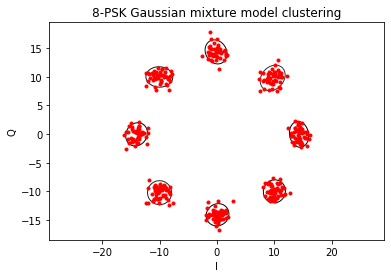

In [255]:
>>> from bayespy.nodes import Dirichlet, Categorical
>>> alpha = Dirichlet(0.0001*np.ones(K),
...                   name='alpha')
>>> Z = Categorical(alpha,
...                 plates=(N,),
...                 name='z')
>>> from bayespy.nodes import Gaussian, Wishart
>>> mu = Gaussian(np.zeros(D),0.0001*np.identity(D),
...               plates=(K,),
...               name='mu')
>>> Lambda = Wishart(D, 0.0001*np.identity(D),
...                  plates=(K,),
...                  name='Lambda')
>>> from bayespy.nodes import Mixture
>>> Y = Mixture(Z, Gaussian, mu, Lambda,
...             name='Y')
>>> Z.initialize_from_random()
>>> from bayespy.inference import VB
>>> Q = VB(Y, mu, Lambda, Z, alpha)
>>> Y.observe(y)
>>> Q.update(repeat=1000)
>>> bpplt.gaussian_mixture_2d(Y, alpha=alpha, scale=2)
plt.title("8-PSK Gaussian mixture model clustering")
plt.xlabel("I")
plt.ylabel("Q")
plt.show()